In [4]:
# This tutorial will use keras library to train a neural net to classify digits in MNIST database
# I assume you have already installed KERAS and other required libraries

# Imports
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils


# Configure GPU, set to use only one GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"]= '1'


Y train 0 : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Y test 0 : [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


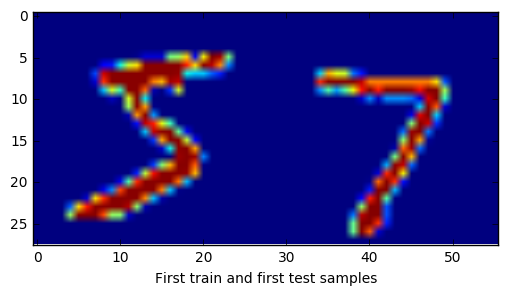

In [11]:
# This code is copied from KERAS website. I have modifed and added expalnations wherever necessary 
# src: https://github.com/fchollet/keras/edit/master/examples/mnist_mlp.py



# Let's first prepare the dataset
# mnist.load_data downlods the data and splits the dataset into train and test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Let's view some data
from matplotlib import pyplot as plt
%matplotlib inline  


# Create two sybplots for train and test data samples

plt.imshow(np.concatenate((X_train[0], X_test[0]), axis=1))
plt.xlabel('First train and first test samples')
print('Y train 0 :', Y_train[0])

print('Y test 0 :' , Y_test[0])





In [ ]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])